# ADVANCED PANDAS: DATA PREPROCESSING

## Course Outline:
- ***Introduction to Data Wrangling***
    - ***Case-study: Data Preprocessing for The Absolute Beginners***
- ***Data Cleaning & Preparation***
    - ***Data Cleaning (Missing & Duplicated Data)***
    - ***String Manipulation (Regular Expression)***
    - ***Data Transformation***
- Merging, Joining, and Concatenating Data
    - concat()
    - merge()
    - join()
- Aggregation and Grouping
    - groupby()
- Reshaping and Pivoting
    - pivot()
    - pivot_table()
    - crosstab()

==========

# *Introduction to Data Wrangling*

## Data Wrangling (Munging) Basics
Data wrangling is defined as the process of taking disorganized or incomplete raw data and standardizing it so that you can easily access, consolidate, and analyze it (i.e. SNR), the steps are as follow:
- Discovering (Understanding Data)
- Structuring (Features Splitting, Tidy-data)
- Cleaning (Missing Data, Outliers Detections, Remove Duplications)
- Enriching (Merging, Concatenation)
- Validating (Data Types)
- Publishing (Readiness for Analysis & Visualization)

In [ ]:
from IPython.display import Image
Image("data/preprocessing.png")

### Resources:
- Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- User Guide (10 Minutes Pandas): https://pandas.pydata.org/docs/user_guide/10min.html
- Exercises: https://www.w3resource.com/python-exercises/pandas/index.php

## Case-study: Data Preprocessing for The Absolute Beginners

Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders.

Data Source (Modified): https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### Step #0: Importing the Libraries

In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns
sns.set()

In [47]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Step #1: Loading the Case Study Data

In [8]:
data = pd.read_csv('data/credit-card-clients.csv')

In [10]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Step #2: Verifying Basic Data Integrity
we will perform a basic check on whether our dataset contains what we expect and verify whether there are the correct number of samples.

### Inspecting Properties

In [12]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,15d69f9f-5ad3,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [20]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [22]:
data.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
data.shape

(30000, 25)

### Step #3: Data Preprocessing

### Finding & Dealing with Duplicated Rows

In [28]:
data['ID']

0        798fc410-45c1
1        8a8c8f3b-8eb4
2        85698822-43f5
3        0737c11b-be42
4        3b7f77cc-dbc0
             ...      
29995    ecff42d0-bdc6
29996    99d1fa0e-222b
29997    95cdd3e7-4f24
29998    00d03f02-04cd
29999    15d69f9f-5ad3
Name: ID, Length: 30000, dtype: object

In [32]:
data['ID'].unique()

array(['798fc410-45c1', '8a8c8f3b-8eb4', '85698822-43f5', ...,
       '95cdd3e7-4f24', '00d03f02-04cd', '15d69f9f-5ad3'], dtype=object)

In [38]:
data['ID'].nunique()

29687

In [40]:
data['ID'].value_counts()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: count, Length: 29687, dtype: int64

In [42]:
data['ID'].value_counts().value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [44]:
id_count = data['ID'].value_counts()
id_count

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: count, Length: 29687, dtype: int64

In [48]:
id_count == 2

ID
ad23fe5c-7b09     True
1fb3e3e6-a68d     True
89f8f447-fca8     True
7c9b7473-cc2f     True
90330d02-82d9     True
                 ...  
2edeb3a6-d38d    False
27e11893-92e9    False
2b1c282b-441e    False
bd737997-0eb0    False
15d69f9f-5ad3    False
Name: count, Length: 29687, dtype: bool

In [50]:
id_count.index

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       'ed32d9fa-fc4d', '0d3c491a-f31a', '43b86f14-5293', '9aea1c3d-6a89',
       'eecd60d0-e496', '2edeb3a6-d38d', '27e11893-92e9', '2b1c282b-441e',
       'bd737997-0eb0', '15d69f9f-5ad3'],
      dtype='object', name='ID', length=29687)

In [56]:
dup_id = id_count.index[id_count == 2]
dup_id

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       '4f249cbc-5e9c', '40e75290-0f59', 'fc73f07e-eb96', '2a8ad33f-fa9c',
       'cdae2be5-8ec4', 'c69162db-4864', '73ea498f-44b2', '327d06d5-ce7f',
       'd13465a5-a9e0', '841ae407-dc4c'],
      dtype='object', name='ID', length=313)

Using the first three IDs on our list of dupes, dupe_ids[0:3], we will plan to first find the rows containing these IDs. If we pass this list of IDs to the .isin method of the ID series, this will create another logical mask we can use on the larger DataFrame to display the rows that have these IDs.

In [62]:
dup_ids = list(dup_id)
dup_ids

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '2a793ecf-05c6',
 '75938fec-e5ec',
 '7be61027-a493',
 'a3a5c0fc-fdd6',
 'b44b81b2-7789',
 '998fa9b2-b341',
 '69566a6b-6156',
 '4e2380e6-a8cf',
 'b87bf8f3-d704',
 '4f95b36b-ab10',
 '214fc1ca-b25a',
 'ab09b4b4-8331',
 '4653bc48-0141',
 '3d832783-1571',
 'd9dafe9c-b497',
 '30729bb5-55d7',
 '26d4a6eb-8abe',
 '6c0797cd-f663',
 'e77f7765-8731',
 '3cd5c728-df14',
 'c361e43d-f1f4',
 '7e7a4087-4def',
 'ddcc7278-7017',
 'edd737fd-5b07',
 'cfa9d026-de0d',
 '6870544f-459e',
 '9ac5d94f-ed71',
 '2458b96d-e8f1',
 'bf23c70b-bf12',
 '3327c2a8-3402',
 '7fe414ae-32f8',
 '8d3a2576-a958',
 '82da3aa5-97a6',
 '45cceda0-6fb7',
 '9db1809e-845a',
 '3e60a98c-e520',
 'a17f0f1f-d9f6',
 'f0bb9e5a-eb11',
 '94c4ece8-bba6',
 '5ce60722-dbd1',
 '56126c14-b5b8',
 '83d174e1-5f9a',
 '355fe35a-5db7',
 'bdb3b33c-83a9',
 '06f377a6-ba7e',
 '77222291-e191',
 '1b22b0ab-aba3',
 'f86688f1-8742',
 '73ed1381-3a3f',
 '2618fdc4-e731',
 '7dbc4ebf

We can see some duplicates here, and it looks like every duplicate ID has one row with data, and another row with all zeros. Is this the case for every duplicate ID? Let's check.

In [64]:
data.loc[data['ID'].isin(dup_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data_zero_mask = data == 0
data_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [97]:
zeros = data_zero_mask.iloc[:,1:].any(axis=1)
zeros

0        True
1        True
2        True
3        True
4        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Length: 30000, dtype: bool

In [107]:
data_cleaned = data.loc[zeros,:]
data_cleaned

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


It looks like there are at least as many "zero rows" as there are duplicate IDs. Let's remove all the rows with all zero features and response, and see if that gets rid of the duplicate IDs.

In [111]:
data_cleaned.shape

(29588, 25)

In [119]:
 data_cleaned2 = data[~data['ID'].duplicated()]
 data_cleaned2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


29588

### Finding & Dealing with Missing Data

In [123]:
data_cleaned2.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4670,1c173e4f-f3db,500000,1,1,1,43,0,0,0,0,...,417759,428608,421871,17000,16500,15000,19000,18032,5000,1
3670,b130ad5a-f1e4,360000,2,2,2,29,Not available,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
8925,1233e164-03ad,20000,1,3,1,51,0,0,0,0,...,18905,19462,18967,1266,1270,2800,1000,0,512,1
3765,50e36089-66df,20000,2,2,2,22,Not available,0,0,0,...,16694,19040,18631,2000,1494,2000,5000,2000,1094,0
60,5c00d7e6-a804,500000,2,3,1,28,Not available,0,0,0,...,14937,13827,15571,1516,1300,1000,1000,2000,2000,1
3778,f9bb17f6-5a0e,230000,1,1,1,39,0,0,0,0,...,186989,159345,162695,11200,6200,6237,7000,6000,6100,0
22726,8469a759-1ea6,90000,2,1,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
16003,dff9306d-68be,230000,2,2,1,37,0,0,0,0,...,124743,127507,121400,4500,4600,4389,4697,4800,4000,0
15369,b39cf6eb-a7df,140000,2,2,1,45,0,0,0,0,...,60971,61374,63243,3000,3000,5000,2000,3000,2500,0
28134,38048f65-7530,550000,2,1,2,44,Not available,-1,-1,0,...,16111,22819,80846,30820,7851,19751,29700,80987,36158,0


Let's throw out these missing values, which were initially hidden from us in the `.info()` output, now.

==========

# *1] Data Cleaning & Preparation*

## Data Cleaning
- Detecting Missing Values
- Dealing with Missing Values
    - Removing Missing Data
    - Replacing Missing Data
- Data with Duplication
    - Detection of Duplicates
    - Handling Duplicates
- Outliers Detection / Handling

##### Importing Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set()

In [4]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Detecting & Dealing with Missing Values

##### Detecting Missing Values Using isna()

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
titanic.notna

<bound method DataFrame.notna of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_

In [20]:
titanic[titanic.isna().values]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [22]:
titanic[titanic.notna().all(axis=1).values]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [24]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

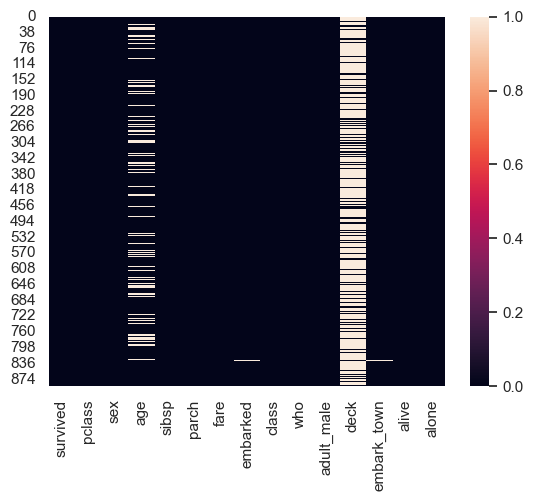

In [26]:
sns.heatmap(titanic.isna())

##### Removing Missing Data Using dropna()

In [52]:
titanic.dropna(how='any', subset=['embark_town'] , inplace=True)

In [54]:
titanic.shape

(889, 15)

##### Handling Missing Data Using fillna() function

In [70]:
mean_of_age = round(titanic['age'].mean(),2)
int(mean_of_age)

29

In [72]:
titanic['age'] = titanic['age'].fillna(mean_of_age)

In [74]:
titanic['age'].isna().sum()

0

### Data with Duplication

##### Finding Duplicated Data Using duplicated() function

In [38]:
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
titanic.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Outliers Detection & Handling

##### Finding & Dealing with Outliers

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

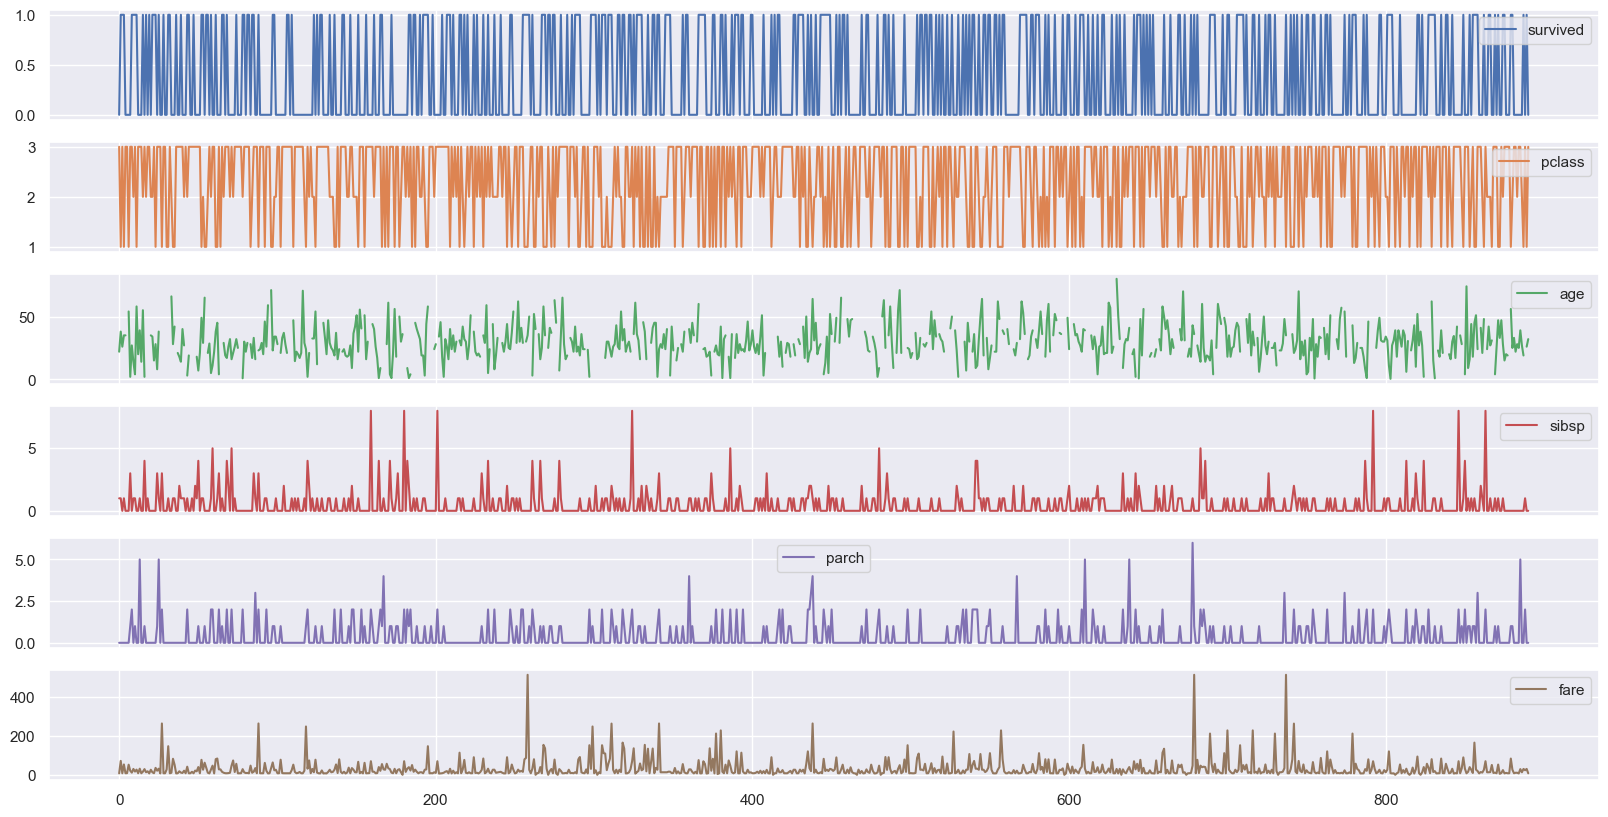

In [58]:
titanic.plot(subplots=True , figsize=(20,10))

In [60]:
titanic.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


{'whiskers': [<matplotlib.lines.Line2D at 0x1c795cc6960>,
 'caps': [<matplotlib.lines.Line2D at 0x1c795cc6ea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c795cc66c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c795cc7320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c795cc75c0>],
 'means': []}

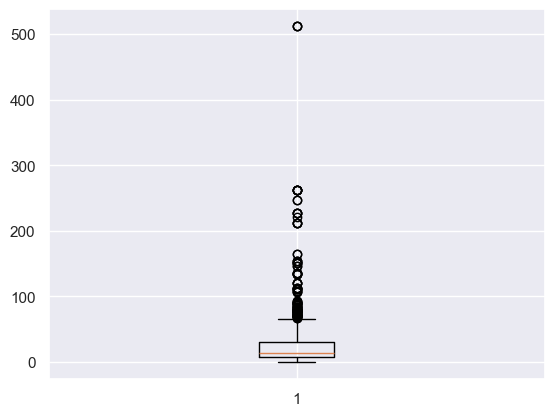

In [62]:
plt.boxplot(titanic['fare'])

In [66]:
clean_fare = titanic[titanic['fare'] < 200]
clean_fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


{'whiskers': [<matplotlib.lines.Line2D at 0x1c795d35520>,
 'caps': [<matplotlib.lines.Line2D at 0x1c795d35d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c795cf3140>],
 'medians': [<matplotlib.lines.Line2D at 0x1c795d35ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c795d36330>],
 'means': []}

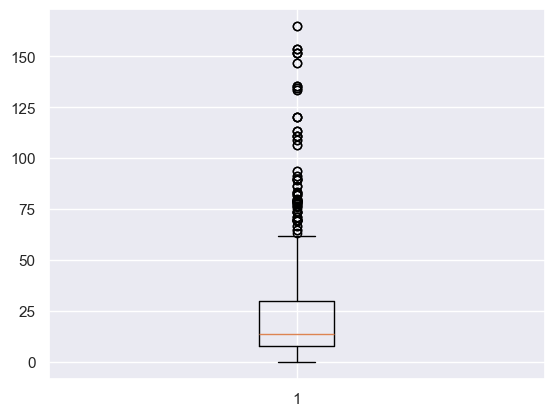

In [70]:
plt.boxplot(clean_fare['fare'])

##### Handling / Removing Outliers

==========

## String Manipulation (Regular Expressions)
- Python String Functions Overview
- Vectorized String Operations
- Dealing with Categorical Data
- Regular Expressions Basics

##### Python Strings Functions

| Method         	| Description                                                                                   	|
|----------------	|-----------------------------------------------------------------------------------------------	|
| capitalize()   	| Converts the first character to upper case                                                    	|
| casefold()     	| Converts string into lower case                                                               	|
| center()       	| Returns a centered string                                                                     	|
| count()        	| Returns the number of times a specified value occurs in a string                              	|
| encode()       	| Returns an encoded version of the string                                                      	|
| endswith()     	| Returns true if the string ends with the specified value                                      	|
| expandtabs()   	| Sets the tab size of the string                                                               	|
| find()         	| Searches the string for a specified value and returns the position of where it was found      	|
| format()       	| Formats specified values in a string                                                          	|
| format_map()   	| Formats specified values in a string                                                          	|
| index()        	| Searches the string for a specified value and returns the position of where it was found      	|
| isalnum()      	| Returns True if all characters in the string are alphanumeric                                 	|
| isalpha()      	| Returns True if all characters in the string are in the alphabet                              	|
| isdecimal()    	| Returns True if all characters in the string are decimals                                     	|
| isdigit()      	| Returns True if all characters in the string are digits                                       	|
| isidentifier() 	| Returns True if the string is an identifier                                                   	|
| islower()      	| Returns True if all characters in the string are lower case                                   	|
| isnumeric()    	| Returns True if all characters in the string are numeric                                      	|
| isprintable()  	| Returns True if all characters in the string are printable                                    	|
| isspace()      	| Returns True if all characters in the string are whitespaces                                  	|
| istitle()      	| Returns True if the string follows the rules of a title                                       	|
| isupper()      	| Returns True if all characters in the string are upper case                                   	|
| join()         	| Joins the elements of an iterable to the end of the string                                    	|
| ljust()        	| Returns a left justified version of the string                                                	|
| lower()        	| Converts a string into lower case                                                             	|
| lstrip()       	| Returns a left trim version of the string                                                     	|
| maketrans()    	| Returns a translation table to be used in translations                                        	|
| partition()    	| Returns a tuple where the string is parted into three parts                                   	|
| replace()      	| Returns a string where a specified value is replaced with a specified value                   	|
| rfind()        	| Searches the string for a specified value and returns the last position of where it was found 	|
| rindex()       	| Searches the string for a specified value and returns the last position of where it was found 	|
| rjust()        	| Returns a right justified version of the string                                               	|
| rpartition()   	| Returns a tuple where the string is parted into three parts                                   	|
| rsplit()       	| Splits the string at the specified separator, and returns a list                              	|
| rstrip()       	| Returns a right trim version of the string                                                    	|
| split()        	| Splits the string at the specified separator, and returns a list                              	|
| splitlines()   	| Splits the string at line breaks and returns a list                                           	|
| startswith()   	| Returns true if the string starts with the specified value                                    	|
| strip()        	| Returns a trimmed version of the string                                                       	|
| swapcase()     	| Swaps cases, lower case becomes upper case and vice versa                                     	|
| title()        	| Converts the first character of each word to upper case                                       	|
| translate()    	| Returns a translated string                                                                   	|
| upper()        	| Converts a string into upper case                                                             	|
| zfill()        	| Fills the string with a specified number of 0 values at the beginning                         	|

In [4]:
import pandas as pd

##### Vectorized String Operations

In [85]:
data = {'Name': ['Mustafa, Ahmed S.', 'Othman, mustafa M.', 'Mazen, Mariam ', 'Burhan, Saddik', 'Abdullah, Omnia N.', 'Jalil, Mustafa'],
       'Age': [26, 34, 18, 36, 28, 38],
       'Country': ['UAE', 'EGY', 'EGY', 'ERI', 'KSA', 'MAR'],
       'M/F': ['M','M','F','M','F', 'M'],
       'Email': ['a.mustafa@teqanny.com', 'm.othman@raqameyyah.com', 'm.mazen@teqanny.com','s.burhan@teqanny.com','o.nasser@teqanny.com','m.jalil@teqanny.com'],
       'Buy': ['Yes', 'No', 'no','Yes','No','Yes']}

students = pd.DataFrame(data)
students

,Name,Age,Country,M/F,Email,Buy
0,"Mustafa, Ahmed S.",26,UAE,M,a.mustafa@teqanny.com,Yes
1,"Othman, mustafa M.",34,EGY,M,m.othman@raqameyyah.com,No
2,"Mazen, Mariam",18,EGY,F,m.mazen@teqanny.com,no
3,"Burhan, Saddik",36,ERI,M,s.burhan@teqanny.com,Yes
4,"Abdullah, Omnia N.",28,KSA,F,o.nasser@teqanny.com,No
5,"Jalil, Mustafa",38,MAR,M,m.jalil@teqanny.com,Yes


In [87]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Country  6 non-null      object
 3   M/F      6 non-null      object
 4   Email    6 non-null      object
 5   Buy      6 non-null      object
dtypes: int64(1), object(5)
memory usage: 420.0+ bytes


In [89]:
students['Name'].str.startswith('M')

0     True
1    False
2     True
3    False
4    False
5    False
Name: Name, dtype: bool

In [91]:
students[students['Name'].str.startswith('M')]

,Name,Age,Country,M/F,Email,Buy
0,"Mustafa, Ahmed S.",26,UAE,M,a.mustafa@teqanny.com,Yes
2,"Mazen, Mariam",18,EGY,F,m.mazen@teqanny.com,no


In [93]:
students['Name'].str.split(', ')[0][0]

'Mustafa'

In [95]:
Second_Name = students['Name'].str.split(', ').str.get(1)
Second_Name

0      Ahmed S.
1    mustafa M.
2       Mariam 
3        Saddik
4      Omnia N.
5       Mustafa
Name: Name, dtype: object

In [97]:
First_Name = students['Name'].str.split(', ').str.get(0)
First_Name

0     Mustafa
1      Othman
2       Mazen
3      Burhan
4    Abdullah
5       Jalil
Name: Name, dtype: object

In [99]:
students['Second_Name'] = Second_Name

In [101]:
students

,Name,Age,Country,M/F,Email,Buy,Second_Name
0,"Mustafa, Ahmed S.",26,UAE,M,a.mustafa@teqanny.com,Yes,Ahmed S.
1,"Othman, mustafa M.",34,EGY,M,m.othman@raqameyyah.com,No,mustafa M.
2,"Mazen, Mariam",18,EGY,F,m.mazen@teqanny.com,no,Mariam
3,"Burhan, Saddik",36,ERI,M,s.burhan@teqanny.com,Yes,Saddik
4,"Abdullah, Omnia N.",28,KSA,F,o.nasser@teqanny.com,No,Omnia N.
5,"Jalil, Mustafa",38,MAR,M,m.jalil@teqanny.com,Yes,Mustafa


In [103]:
students['First_Name'] = First_Name

In [105]:
students

,Name,Age,Country,M/F,Email,Buy,Second_Name,First_Name
0,"Mustafa, Ahmed S.",26,UAE,M,a.mustafa@teqanny.com,Yes,Ahmed S.,Mustafa
1,"Othman, mustafa M.",34,EGY,M,m.othman@raqameyyah.com,No,mustafa M.,Othman
2,"Mazen, Mariam",18,EGY,F,m.mazen@teqanny.com,no,Mariam,Mazen
3,"Burhan, Saddik",36,ERI,M,s.burhan@teqanny.com,Yes,Saddik,Burhan
4,"Abdullah, Omnia N.",28,KSA,F,o.nasser@teqanny.com,No,Omnia N.,Abdullah
5,"Jalil, Mustafa",38,MAR,M,m.jalil@teqanny.com,Yes,Mustafa,Jalil


In [ ]:
students['Name'].str.split(expand=True)

In [ ]:
students[['Last Name', 'First Name']] = students.Name.str.split(', ', expand=True)

In [ ]:
students

In [67]:
students[students.Country.str.match('EGY')]

,Name,Age,Country,M/F,Email,Buy,First_Name,Second_Name
1,"Othman, mustafa M.",34,EGY,M,m.othman@raqameyyah.com,No,Othman,mustafa M.
2,"Mazen, Mariam",18,EGY,F,m.mazen@teqanny.com,no,Mazen,Mariam


In [107]:
students['M/F'] = students['M/F'].str.replace('M', 'Male')
students['M/F'] = students['M/F'].str.replace('F', 'Female')

students

,Name,Age,Country,M/F,Email,Buy,Second_Name,First_Name
0,"Mustafa, Ahmed S.",26,UAE,Male,a.mustafa@teqanny.com,Yes,Ahmed S.,Mustafa
1,"Othman, mustafa M.",34,EGY,Male,m.othman@raqameyyah.com,No,mustafa M.,Othman
2,"Mazen, Mariam",18,EGY,Female,m.mazen@teqanny.com,no,Mariam,Mazen
3,"Burhan, Saddik",36,ERI,Male,s.burhan@teqanny.com,Yes,Saddik,Burhan
4,"Abdullah, Omnia N.",28,KSA,Female,o.nasser@teqanny.com,No,Omnia N.,Abdullah
5,"Jalil, Mustafa",38,MAR,Male,m.jalil@teqanny.com,Yes,Mustafa,Jalil


In [ ]:
# Concatenating two features
students['M/F'].str.cat(students['Age'].astype(str), sep='_')

In [ ]:
# Searching for a specific record
students[(students.Name.str.contains('Mustafa')) & (students.Age >= 35)]

In [ ]:
# Replacing values
students['M/F'] = students['M/F'].str.replace('F','Female').str.replace('M','Male')
students

##### Dealing with Categorical Data

In [ ]:
students['Buy'].dtype

In [ ]:
students.convert_dtypes()

In [ ]:
students.info()

In [ ]:
students['Buy'] = students['Buy'].astype('category')

In [ ]:
students.info()

In [ ]:
students['Buy'] = students['Buy'].cat.rename_categories({'No':'N', 'Yes':'Y'})
# cat.set_categories()
# cat.add_categories()
# cat.remove_categories()
# cat.reorder_categories()

In [ ]:
students['Buy'].dtype

In [ ]:
students

In [ ]:
# Label-Encoding
students['Buy'].cat.codes

In [ ]:
# One-Hot-Encoding
pd.get_dummies(students, columns=['Buy'])

In [ ]:
# Let's change the data a little bit to add pitfalls 
students['Buy'].cat.categories

In [ ]:
students['Buy'].replace({'Noo':'No'}, inplace=True)

In [ ]:
students['Buy'].str.title(inplace=True)

In [ ]:
students

##### Regular Expressions Basics (RegEx)
RegEx functions fall into three categories: pattern matching, substitution, and splitting

- RegEx Cheat-sheet: https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf
- A useful tool: https://regex101.com/
- Exercises: https://www.geeksforgeeks.org/tag/python-regex-programs/

In [ ]:
from IPython.display import Image
Image("data/regex.png")

In [2]:
# loading regular expression library 're'
import re

In [12]:
text = '''Hello, my name is Mustafa Othman.
I am 35 years old, and I get paid $100 USD/Hour for a consulting session.
My e-mail address is 'mustafa.elnahas@gmail.com'
You can reach me easily on: (106) 670-9959.-
(106) 614-0610'''

In [14]:
if (re.search(r'[a-z A-Z 0-9.]+@[A-Z a-z.]+' , text)):
    print('Confirm Email')
else:
    print('No Email')

Confirm Email


==========

## Data Transformation
- Shuffling Data
- Mapping
- Discretization
- Normalizing, Standardization & Scaling 

##### Shuffling Data Using sample()

In [ ]:
titanic.sample()

In [ ]:
titanic_sample = titanic.sample(10).reset_index(drop=True)
titanic_sample

##### Mapping Using map() Function

In [ ]:
titanic.sample(5)

In [ ]:
titanic['pclass'] = titanic['pclass'].map({1:'First', 2:'Second', 3:'Third'})

In [ ]:
titanic.head()

##### Discretization & Bining Using cut() Function

In [ ]:
# Grouping people by their ages' ranges
pd.cut(titanic['age'], bins=[0,10,18,30,45,65,100], precision=2).value_counts()
# pd.cut(titanic['age'], 6).value_counts()

In [ ]:
titanic['ages_ranges'] = pd.cut(titanic['age'], bins=[0,10,18,30,45,65,100],
                                labels=['Child', 'Teenager', 'Adult', 'Youth', 'MiddleAged', 'Senior'])
titanic

In [ ]:
sns.countplot(titanic['ages_ranges'])
# titanic['ages_ranges'].hist()

In [ ]:
# Calculate the average values for each ages ranges
titanic.groupby('ages_ranges')['survived'].mean()

In [ ]:
# Discretize variable into equal-sized buckets
pd.qcut(titanic['fare'],3,['Cheap','Normal','Expensive']).value_counts()

##### Scaling & Standardization

In [ ]:
titanic.describe()

In [ ]:
plt.figure(figsize=(20,10))
titanic['fare'].plot()
plt.show()

In [ ]:
titanic['fare'] = ((titanic['fare'] - titanic['fare'].mean()) / titanic['fare'].std()).round(2)
titanic

In [ ]:
titanic.describe().round(2)

==========

# THANK YOU!